# Векторная модель [Vector Space Model]

Все (слово, документ) – вектор. Документ $doc$ может быть представлен вектором в пространстве слов:

\begin{equation*}
\vec{doc} = (f_1, \ldots, f_{|V|}), 
\end{equation*}

\begin{equation*}
V - vocabulary, word \in V
\end{equation*}



|   | $d_1$ | $d_2$   | $\ldots$  | $d_C$ |
|---|-------|---|---|----|
| $w_1$  |  $f_{11}$     |   $\ldots$ |   |    |
| $w_2$  |     $\ldots$   |   |   |    |
| $\ldots$  |       |   |   |    |
| $w_V$  |       |   |   | $f_{VC}$   |


\begin{equation*}
C - corpus, doc \in C
\end{equation*}

\begin{equation*}
f(word, doc) - \text{вес слова}~word~\text{в}~doc
\end{equation*}

### Веса 

* $f(word, doc) =
  \begin{cases}
    1 & \text{if}~word~\in~doc\\
    0, otherwise \\
  \end{cases}$


* $f(word, doc) = tf(word, doc) = \frac{\text{count}(word,doc)}{\sum_i \text{count}(word_i,doc) } $


* $f(word, doc) = \text{tf}(word, doc) \times \text{idf}(word) = $

= $\frac{\text{count}(word,doc)}{\sum_i \text{count}(word_i,doc) }  \times \log \frac{|C|}{\text{count}(doc | word \in doc)}$

$\vec{doc}$ может быть использован:
* как входное представление документа для любого алгоритма машинного обучения 
* для определения близости между документами

\begin{equation*}
\text{similarity}(d_i, d_j) = \text{cosine}(\vec{doc}_i, \vec{doc}_j)  = \frac{\sum_k f_{ki} f_{kj}}{\sqrt{\sum_k f_{ki}^2 } \sqrt{\sum_k f_{kj}^2 } }
\end{equation*}

<img src="img/cos.png" width="300">

Слово может быть тоже представлено вектором, но в пространстве документов $|C| << |V|$.

|   | $d_1$ | $d_2$   | $\ldots$  | $d_C$ |
|---|-------|---|---|----|
| $w_1$  |  $f_{11}$     |   $\ldots$ |   |    |
| $w_2$  |     $\ldots$   |   |   |    |
| $\ldots$  |       |   |   |    |
| $w_V$  |       |   |   | $f_{VC}$   |

In [1]:
Поэтому чаще в качестве координат в векторном пространстве рассматривают соседние слова, т.н. контексты

SyntaxError: invalid syntax (<ipython-input-1-aefea37a9cb9>, line 1)

In [ ]:
# left and right contexts to the word "gravity"
from nltk.text import Text  
import re

regex = r'\w+'

gravity =  ' '.join(open('data/Gravity.txt').readlines())
tokens = re.findall(regex, gravity.lower())
txt = Text(tokens)
txt.concordance('gravity', lines = 10);

|   | $c_1$ | $c_2$   | $\ldots$  | $c_V$ |
|---|-------|---|---|----|
| $w_1$  |  $f_{11}$     |   $\ldots$ |   |    |
| $w_2$  |     $\ldots$   |   |   |    |
| $\ldots$  |       |   |   |    |
| $w_V$  |       |   |   | $f_V$   |

### Веса

* $f(word, context) =
  \begin{cases}
    1 & \text{если слово встречается в контексте}\\
    0, otherwise \\
  \end{cases}$


* $f(word, context) = freq(word, context) = \frac{\text{count}(word,context)}{|D|}$, $D$ - все пары ($word, context$)


* $f(word, context) = PPMI(word, context)
  \begin{cases}
    PMI(word, context) = \frac{\text{count}(word,context) |D|}{\text{count}(word), \text{count}(count)} \\
    0, otherwise \\
  \end{cases}$

Почему PPMI?
* $freq$(the, cat) > $freq$(cute, cat)
* $PPMI$(the, cat) < $PPMI$(cute, cat)

### Проблемы
1. матрицы слишком разряжены;
2. невозможно установить семантическую близость между словами: слова ``кошка'' и ``собака'' по смыслу похожи (до какой-то степени), но встречаются в разных контекстах, то есть:

$cosine$(кошка, собака) $\rightarrow 0$.

# Снижение размерности

Каждое слово представляется вектором размерности $d$:


\begin{equation*}
\vec{word}  \in \mathbb{R}^{|V|} \rightarrow \vec{e}_{word}\in \mathbb{R}^d
\end{equation*}

## Сингулярное разложение


\begin{equation*}
M = U S V^{T},
\end{equation*}

матрица $M$ – матрица слово-контекст, $U$ – матрица левых сингулярных векторов, $S$  – матрица сингулярных чисел, $V^T$ – матрица правых сингулярных векторов. 

После обнуления всех, кроме первых $d$ сингулярных чисел, положим $M_d = U_d S_d V^{T}_d$ – лучшая аппроксимация матрицы $M$ ранга $d$ в смысле МНК. 

$M_d = U_d \times S_d \times v^{T}_d$



Эмбеддинги: $U_d \times \sqrt{S_d}$

![title](img/svd.png)

Зачем нужны эмбеддинги:
* решать лингвистические задачи
* подавать на вход нейронным сетям

![title](img/word2vec-gender-relation.png)

Как оценить качество эмбеддингов:

* **синонимы**: найти ближайшее по смыслу слово
* **ассоциации**: man : king = woman : queen 
* **лишнее слово**: cat dog fish cow pizza $\rightarrow$ pizza

## Word2vec 


Две архитектуры:
* Continious bag of words
* Skip-gram

Две оптимизационные задачи:
* Negative sampling 
* Hierarchical softmax

Предсказание наблюдаемой пары (word, context)  $\in D$:

$P(D=1|word,context) = \frac{1}{1+e^{-s(word,context)}} \rightarrow  \max $

Предсказание ненаблюдаемой пары (word, context)  $\in \bar{D}$:

$P(D=0|word,context) = \frac{1}{1+e^{-s(word,context)}} \rightarrow \max $

Выбираем $k$ неналюдаемых пар из $\bar{D}$

Все вместе $L(D,\bar{D}) = P(D=1|word,context) + P(D=0|word,context)$

**Continious bag of words**: предсказываем слово в контексте $c_{-2}, c_{-1},  c_{1}, c_{2}$, контексты зависимы

<img src="img/cbow.png" width="300">

$x$ – one-hot вектора размерности  $|V|$

скрытый слой: $W \in \mathbb{R} ^ {V \times N}$ – матрица весов

$h = x^T W = v_{w}$ - векторное представление входного слова

выходной слой: $W' \in \mathbb{R} ^ {N \times V}$ – матрица весов. 

$ u_j = v_{w}^{'T} h $ - score for each word in the vocabulary

$ p(w|c) = \frac{u_c}{\sum_j u_j}$ - функция softmax используется для итоговой классификации на итоговом слое

функция потерь: $\max(w|c) = u_{c^*} - log \sum_{j \in V} exp(u_j)$

Эмбеддинг слова $word_i$ is $\vec{word}_i = x \times W$, строка в матрицы весов размерности $N$.

**Skip-gram**: предсказываем контекст по слову, контексты независимы


функция потерь: $ - \log \prod \frac{ exp(u_{c,j*}) }{ \sum_{j'} exp(u_{j'})} = -\sum_j u_{c,j*} + C \log \sum_{j'} exp(u_{j'})  $


<img src="img/sgns.png" width="300">

## Gensim для Word2Vec

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import random
import numpy as np
from sklearn.metrics import *
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
random.seed(1228)

%matplotlib inline

Загружаем лемматизированные статьи без стоп-слов и создаем массив текстов

In [3]:
from pymystem3 import Mystem
import re
import regex


m = Mystem()



def words_only(text):
    try:
        tmp = re.sub(r'\W+', ' ', text)
        tmp = regex.sub(u'[\p{Latin}]', u'', tmp)
        return ' '.join(tmp.split())
    except:
        return ""



def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "


In [4]:
df_neg = pd.read_csv("data/negative.csv", sep=';', header = None, usecols = [3])
df_pos = pd.read_csv("data/positive.csv", sep=';', header = None, usecols = [3])
df_neg['sent'] = 'neg'
df_pos['sent'] = 'pos'
df = pd.concat([df_neg, df_pos])
df.columns = ['text', 'sent']
df.text = df.text.apply(words_only)
df.text = df.text.apply(lemmatize)

In [5]:
df_pos[3].tolist()[:10]

['@first_timee хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа)',
 'Да, все-таки он немного похож на него. Но мой мальчик все равно лучше:D',
 'RT @KatiaCheh: Ну ты идиотка) я испугалась за тебя!!!',
 'RT @digger2912: "Кто то в углу сидит и погибает от голода, а мы ещё 2 порции взяли, хотя уже и так жрать не хотим" :DD http://t.co/GqG6iuE2…',
 '@irina_dyshkant Вот что значит страшилка :D\nНо блин,посмотрев все части,у тебя создастся ощущение,что авторы курили что-то :D',
 'ну любишь или нет? — Я не знаю кто ты бля:D http://t.co/brf9eNg1U6',
 'RT @SpoonLamer: Ох,900 :D ну это конечно же @twinkleAYO . Чтобы у нее было много друзей, ведь она такая мимими &lt;3',
 'RT @veregijytaqo: У тебя есть ухажёр? Нет - мои уши не кто не жрёт :D',
 'Поприветствуем моего нового читателя @Alexey1789 ;)',
 'Теперь у меня есть частичка Сиднея :) #Sydney #SydneyOperaHouse http://t.co/agnto3CZEi']

In [6]:
df.head()

,text,sent
0,на работа быть полный пиддеса и так каждый зак...,neg
1,коллега сидеть рубиться в а я из за долбать ви...,neg
2,_4 как говорить обещаной три год ждать,neg
3,желать хороший полет и удачный посадка я быть ...,neg
4,обновлять за какой то леший теперь не работать...,neg


In [7]:
texts = [df.text.iloc[i].split() for i in range(len(df))]

## Обучение модели в gensim

In [8]:
texts[0]

['на',
 'работа',
 'быть',
 'полный',
 'пиддеса',
 'и',
 'так',
 'каждый',
 'закрытие',
 'месяц',
 'я',
 'же',
 'свихиваться',
 'так']

In [9]:
%%time
from gensim.models import Word2Vec
model = Word2Vec(texts, size=300, window=5, min_count=5, workers=4)
model.save("sent_w2v.model")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


CPU times: user 47.3 s, sys: 1.11 s, total: 48.4 s
Wall time: 26.2 s


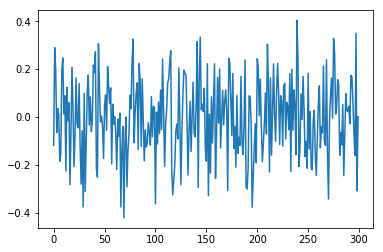

In [10]:
plt.plot(model['корпоратив']);

In [11]:
model.wv.most_similar("корпоратив")

[('ярмарка', 0.8443567156791687),
 ('вечеринка', 0.8314090967178345),
 ('стадион', 0.8301519155502319),
 ('выставка', 0.8270410299301147),
 ('утренник', 0.8180621862411499),
 ('резина', 0.8174659609794617),
 ('фестиваль', 0.8100624680519104),
 ('сеанс', 0.7962114214897156),
 ('площадь', 0.795557975769043),
 ('арена', 0.7943349480628967)]

In [12]:
model.wv.most_similar(positive=["хорошо","плохой"], negative=["хороший"])

[('плохо', 0.7034682035446167),
 ('легко', 0.6294450163841248),
 ('прежде', 0.5558974146842957),
 ('хуево', 0.5547043085098267),
 ('удобно', 0.5371049046516418),
 ('хреновый', 0.5365163087844849),
 ('неплохо', 0.5351290106773376),
 ('круто', 0.5205016732215881),
 ('странно', 0.5157516598701477),
 ('сложно', 0.5080855488777161)]

In [13]:
model.wv.most_similar(positive=["тепло","зима"], negative=["лето"])

[('холодно', 0.7325491309165955),
 ('ветер', 0.72285395860672),
 ('жарко', 0.6967766284942627),
 ('морозец', 0.6742866039276123),
 ('метель', 0.6712437272071838),
 ('уютно', 0.6620253920555115),
 ('сыро', 0.6462206840515137),
 ('холодный', 0.6444594860076904),
 ('теплый', 0.6374228000640869),
 ('снег', 0.63469398021698)]

In [14]:
model.doesnt_match("борщ сметана макароны пирожок консомэ кошка".split())

'кошка'

### Визуализация пространства слов 

In [15]:
top_words = []
from collections import Counter
fd = Counter()
for text in texts:
    fd.update(text)
for i in fd.most_common(1000):
    top_words.append(i[0])
print(top_words)

['я', 'не', 'и', 'в', 'что', '_', 'на', 'а', 'быть', 'с', 'ты', 'как', 'то', 'у', 'это', 'все', 'так', 'но', 'он', 'ну', 'мы', 'мой', 'по', 'за', 'весь', 'хотеть', 'такой', 'еще', 'день', 'уже', 'этот', 'вот', 'да', 'же', 'она', 'только', 'кто', 'сегодня', 'мочь', 'бы', '__', 'нет', 'вы', 'они', 'когда', 'очень', '3', 'к', 'из', 'знать', 'просто', 'год', 'один', 'какой', 'человек', 'любить', 'от', 'если', 'теперь', 'о', 'надо', 'свой', 'даже', '2', 'завтра', 'тоже', 'новый', 'до', 'там', '1', 'хороший', 'вообще', 'хорошо', 'тот', 'себя', 'делать', 'для', 'самый', 'спасибо', 'сейчас', 'понимать', 'много', 'спать', 'блин', 'почему', 'сказать', 'раз', 'думать', 'утро', 'который', 'время', 'смотреть', 'идти', '4', 'говорить', 'пойти', 'без', 'тут', 'или', 'сидеть', 'давать', '5', 'писать', 'друг', 'жизнь', 'сделать', 'школа', 'ничто', 'со', 'всегда', '9', 'настроение', 'про', 'можно', 'скоро', 'ждать', 'ночь', 'первый', 'мама', 'сам', 'потом', 'где', 'час', 'наш', 'болеть', 'приходить', 'с

In [16]:
top_words_vec = model[top_words]

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
top_words_tsne = tsne.fit_transform(top_words_vec)

In [18]:
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="word2vec T-SNE for most common words")

source = ColumnDataSource(data=dict(x1=top_words_tsne[:,0],
                                    x2=top_words_tsne[:,1],
                                    names=top_words))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

show(p)

Loading BokehJS ...

### Кластеризация слов 

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(top_words_vec)

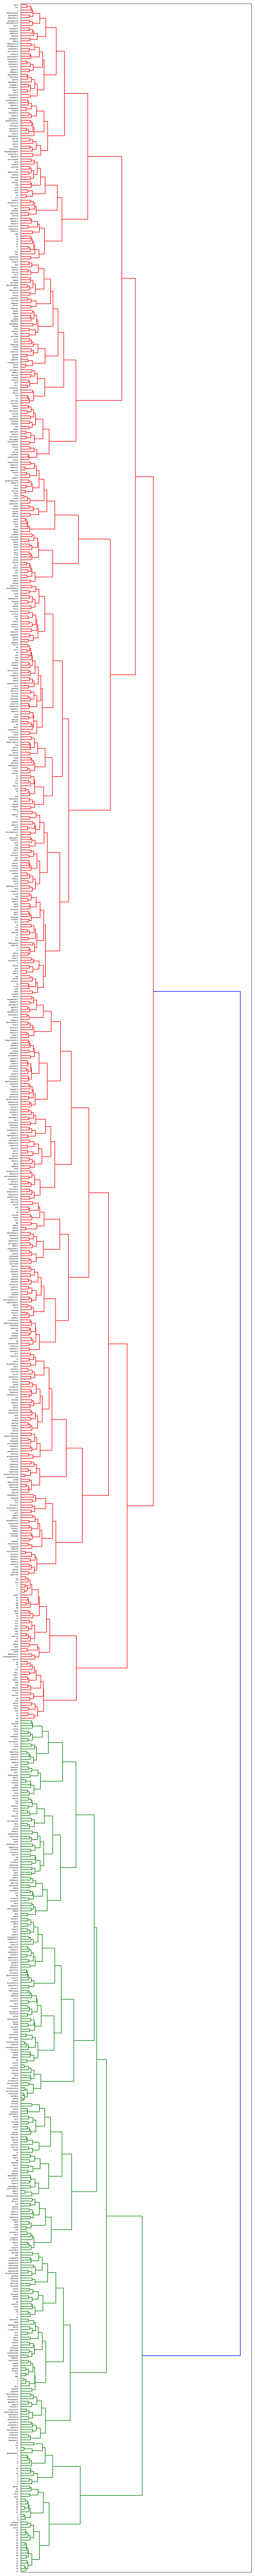

In [20]:
from scipy.cluster.hierarchy import  ward, dendrogram

linkage_matrix = ward(dist) 

fig, ax = plt.subplots(figsize=(10, 100)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=top_words);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() 

plt.savefig('w2v_clusters.png', dpi=200) #save figure as ward_clusters

## Классификация текстов 

По мотивам http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/

##  word2vec, doc2vec и fasttext 


1. word2vec – векторное представление слова
2. как сделать вектор документа?
    * усреднить все вектора слов
    * усреднить все вектора слов с $tf-idf$ весами
    * doc2vec
3. fasttext – векторное представление $n$-грам


In [21]:
X = df.text.tolist()
y = df.sent.tolist()

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
print ("total train examples %s" % len(y_train))
print ("total test examples %s" % len(y_test))

total train examples 151978
total test examples 74856


In [22]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(w2v.popitem()[1])

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [23]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(w2v.popitem()[1])

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [24]:
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rfc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])
rfc_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])

In [ ]:
rfc_w2v.fit(X_train,y_train)
pred = rfc_w2v.predict(X_test)

In [ ]:
print("Precision: {0:6.2f}".format(precision_score(y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))
labels = rfc_w2v.classes_


sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [ ]:
rfc_w2v_tfidf.fit(X_train,y_train)
pred = rfc_w2v_tfidf.predict(X_test)

In [ ]:
print("Precision: {0:6.2f}".format(precision_score(y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))
labels = rfc_w2v.classes_


sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

## paragraph2vec aka doc2vec


word2vec с дополнительной меткой id документа

![img](img/w2v_4.png)

In [ ]:
from gensim.models.doc2vec import *

In [ ]:
splitted_texts = [text.split() for text in X]
idx = [str(i) for i in range(len(X))]

docs = []
for i in range(len(X)):
    docs.append(TaggedDocument(splitted_texts[i], [idx[i]]))


model = Doc2Vec(size=300, window=5, min_count=5, workers=8, alpha=0.025, min_alpha=0.01, dm=0)
model.build_vocab(docs)
model.train(docs, total_examples=len(docs), epochs=20)

In [ ]:
class Doc2VecVectorizer(object):
    def __init__(self, d2v_model):
        self.d2v_model = d2v_model


    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([self.d2v_model.infer_vector(text.split()) for text in X])


rfc_d2v = Pipeline([
    ("word2vec vectorizer", Doc2VecVectorizer(model)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])

rfc_d2v.fit(X_train,y_train)
pred = rfc_d2v.predict(X_test)

In [ ]:
print("Precision: {0:6.2f}".format(precision_score(y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))
labels = rfc_w2v.classes_


sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

## fasttext 

Слово $w$ представляем символьными $n$-грамами: 

$n=3$, $G_{where} = \_wh, whe, her, re\_, \_where\_$

$sim_{w2v}(u,v) = <u,v>$


$ sim_{ft} (u,v) = \sum_{e \in G_u} \sum_{g \in G_v} <e,v>$


https://github.com/facebookresearch/fasttext

In [ ]:
import fasttext

with open('data.train.txt', 'w+') as outfile:
    for i in range(len(X_train)):
        outfile.write('__label__' + y_train[i] + ' '+ X_train[i] + '\n')
    

with open('test.txt', 'w+') as outfile:
    for i in range(len(X_test)):
        outfile.write('__label__' + y_test[i] + ' ' + X_test[i] + '\n')

In [ ]:
classifier = fasttext.supervised('data.train.txt', 'model')
result = classifier.test('test.txt')
print('P@1:', result.precision)
print('R@1:', result.recall)
print('Number of examples:', result.nexamples)

In [ ]:
pred = classifier.predict(X_test)


print("Precision: {0:6.2f}".format(precision_score(y_test, pred, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, pred, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, pred)))
print(classification_report(y_test, [i[0] for i in pred]))
labels = rfc_w2v.classes_


sns.heatmap(data=confusion_matrix(y_test, pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()